<a href="https://www.kaggle.com/code/oxspaceman/scoutium-talent-scouting-with-ml-catboost?scriptVersionId=252149100" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


# ⚽ SCOUTIUM
# Machine Learning Talent Scouting Classification

# ⚽ Football Talent Scouting Classification

## 📊 Project Overview
This project aims to classify football players' potential using machine learning based on scout evaluations.

## 🎯 Problem Statement
- **Goal**: Predict players' "average" and "highlighted" potential labels
- **Data**: Scout evaluations and player attributes
- **Metric**: ROC-AUC (suitable for imbalanced dataset)

## 📈 Methodology

### Data Preprocessing
1. **Data Merging**: Combining attributes and labels datasets
2. **Data Cleaning**: Removing goalkeeper position and below_average class
3. **Pivot Transformation**: Restructuring data with one player per row
4. **Feature Scaling**: Normalization using StandardScaler

### Model Selection Rationale
- **8 different algorithms** were tested
- **CatBoost** achieved the best performance 
- **auto_class_weights='Balanced'** used for imbalanced data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from sklearn.metrics import precision_score, f1_score, recall_score, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.width", 500)
import warnings
warnings.simplefilter(action="ignore")

In [2]:
potential_df = pd.read_csv("/kaggle/input/scoutium/scoutium_potential_labels.csv", sep=";")
attribute_df = pd.read_csv("/kaggle/input/scoutium/scoutium_attributes.csv", sep=";")


# merge csv "task_response_id", 'match_id', 'evaluator_id' ,"player_id"


df = attribute_df.merge(potential_df, on=["task_response_id", 'match_id', 'evaluator_id' ,"player_id"])
df.shape

# removing goalkeeper

df["position_id"].value_counts(normalize=True)
df = df[df["position_id"] != 1]
df["position_id"].unique()


# below_average is %1 

df["potential_label"].unique()
df["potential_label"].value_counts(normalize=True)
df = df[df["potential_label"] != "below_average"]



pivot_df = pd.pivot_table(df,
                          values="attribute_value",
                          index=["player_id", "position_id", "potential_label"],
                          columns="attribute_id").reset_index()

pivot_df.columns = pivot_df.columns.astype(str)
pivot_df.columns

# average & highlighted need Label Encoding

pivot_df["potential_label"] = LabelEncoder().fit_transform(pivot_df["potential_label"])



def grab_col_names(dataframe, cat_th=10, car_th=20):
   
    
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    
    num_but_cat = [col for col in dataframe.columns if
                   dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]

    
    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]

    
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

   
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car
cat_cols, num_cols, cat_but_car = grab_col_names(pivot_df)

# Standart Scale

sc = StandardScaler()
pivot_df[num_cols] = sc.fit_transform(pivot_df[num_cols])

Observations: 271
Variables: 37
cat_cols: 7
num_cols: 30
cat_but_car: 0
num_but_cat: 7


Base Models....
roc_auc: 0.8025 (LR) 
roc_auc: 0.7515 (KNN) 
roc_auc: 0.7405 (CART) 
roc_auc: 0.8986 (RF) 
roc_auc: 0.8386 (GBM) 
roc_auc: 0.8544 (XGBoost) 
roc_auc: 0.8588 (LightGBM) 
roc_auc: 0.8924 (CatBoost) 
Base Models....
accuracy: 0.8524 (LR) 
accuracy: 0.797 (KNN) 
accuracy: 0.7935 (CART) 
accuracy: 0.8781 (RF) 
accuracy: 0.8524 (GBM) 
accuracy: 0.8524 (XGBoost) 
accuracy: 0.845 (LightGBM) 
accuracy: 0.8744 (CatBoost) 
Base Models....
precision: 0.752 (LR) 
precision: 0.6444 (KNN) 
precision: 0.5746 (CART) 
precision: 0.8783 (RF) 
precision: 0.7257 (GBM) 
precision: 0.7004 (XGBoost) 
precision: 0.6716 (LightGBM) 
precision: 0.8524 (CatBoost) 
Base Models....
f1: 0.5526 (LR) 
f1: 0.2483 (KNN) 
f1: 0.5261 (CART) 
f1: 0.602 (RF) 
f1: 0.578 (GBM) 
f1: 0.5865 (XGBoost) 
f1: 0.5691 (LightGBM) 
f1: 0.6066 (CatBoost) 
🏆 FINAL MODEL PERFORMANCE - CatBoost
🎯 ROC-AUC Score: 0.899
📊 Accuracy: 0.886
🎪 Precision: 0.798
🔍 Recall: 0.641
⚖️ F1-Score: 0.697


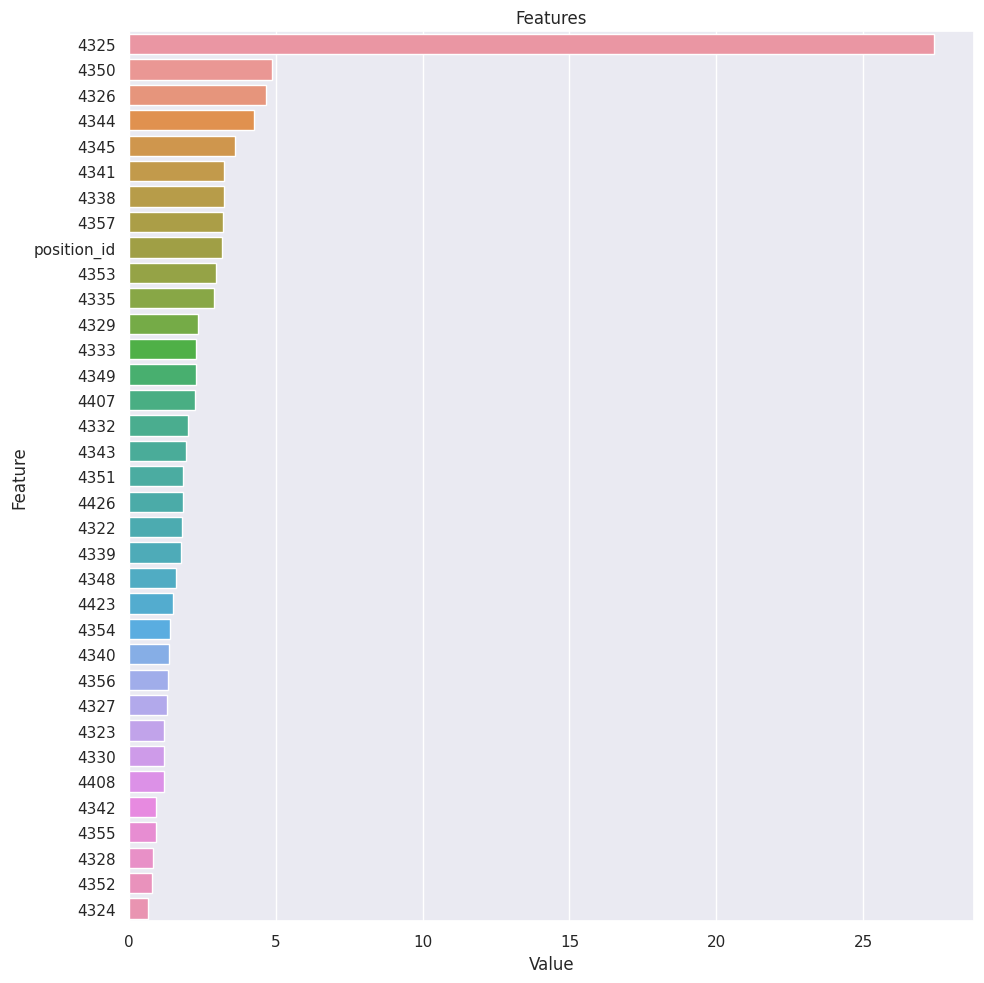

In [3]:
# Multi model Roc_auc, f1, precision, recall, accuracy 

X = pivot_df.drop(["potential_label", "player_id"], axis=1)
y = pivot_df["potential_label"]

def base_models(X, y, scoring="roc_auc"):
    print("Base Models....")
    models = [('LR', LogisticRegression()),
          ("KNN", KNeighborsClassifier()),
          ("CART", DecisionTreeClassifier()),
          ("RF", RandomForestClassifier()),
          ('GBM', GradientBoostingClassifier()),
          ('XGBoost', XGBClassifier(eval_metric='logloss')),
          ("LightGBM", LGBMClassifier(verbose=-1)),
          ('CatBoost', CatBoostClassifier(verbose=False))
             ]

    for name, classifier in models:
        cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

# ⚠️ Dont mind score printed below ,just example⚠️

# roc_auc scores
base_models(X, y)
# Base Models....
# roc_auc: 0.8039 (LR)
# roc_auc: 0.7515 (KNN)
# roc_auc: 0.6841 (CART)
# roc_auc: 0.8921 (RF)
# roc_auc: 0.8477 (GBM)
# roc_auc: 0.8544 (XGBoost)
# roc_auc: 0.8588 (LightGBM)
# roc_auc: 0.8924 (CatBoost)

# accuracy scores
base_models(X, y, scoring="accuracy")


# precision scores
base_models(X, y, scoring="precision")


# f1 scores
base_models(X, y, scoring="f1")


catboost_model = CatBoostClassifier(auto_class_weights='Balanced',random_state=17, verbose=False)
# ⚠️ auto_class_weights='Balanced' dataset is imbalanced

catboost_params = {"iterations": [100, 200, 500], # 📌 number of trees
                   "learning_rate": [0.05, 0.1, 0.5], 
                   "depth": [3, 6, 8]} # 📌 tree depth

catboost_best_grid = GridSearchCV(catboost_model,
                                  catboost_params,
                                  cv=5,
                                  n_jobs=-1,
                                  verbose=False).fit(X, y)
catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_, random_state=17).fit(X, y)

# 🔧 Final model

cv_results = cross_validate(catboost_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])

print("🏆 FINAL MODEL PERFORMANCE - CatBoost")
print(f"🎯 ROC-AUC Score: {round(cv_results['test_roc_auc'].mean(), 3)}")
print(f"📊 Accuracy: {round(cv_results['test_accuracy'].mean(), 3)}")
print(f"🎪 Precision: {round(cv_results['test_precision'].mean(), 3)}")
print(f"🔍 Recall: {round(cv_results['test_recall'].mean(), 3)}")
print(f"⚖️ F1-Score: {round(cv_results['test_f1'].mean(), 3)}")


# Feature Importance

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set_theme(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(catboost_final, X)

## 🎯 Football Talent Classification
Scout evaluations → Player potential prediction

## 📊 Results
- **Best Model**: CatBoost (ROC-AUC: 0.89)
